In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
from Bio import SeqIO
from DNA_CGR_generation import *
from CGR_image_classifier import *

In [2]:
"""
Classify Yeast/Human or Saccharomyces/Candida Genomes. 
Proof of function for genome classification using trained neural network.

Functions for nerual network implementation see CGR_image_classifier.py
Functions for generation of chaos game genome images see DNA_CGR_generation.py


"""

#Load Neural Network Weights
#Trained Neural network parameters can be downloaded from https://drive.google.com/drive/folders/1pHurLZddrC_J5KYkJh1DAASCZ5yH3a3D?usp=sharing
try:
    sc_parameters = np.load('nn sac candida parameters.npy', allow_pickle = True).item() #Sac Candida classifier, 0 label candida, 1 label Sac
    hy_parameters = np.load('nn human sac parameters.npy', allow_pickle = True).item() #Human Yeast classifier, 0 label human, 1 label Sac
except:
    print('File not found, files can be downloaded from https://drive.google.com/drive/folders/1pHurLZddrC_J5KYkJh1DAASCZ5yH3a3D?usp=sharing  and places in same folder as this file')
    
    
    

Example images
0: Candida


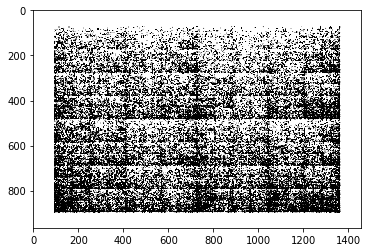

1: Saccharomyces


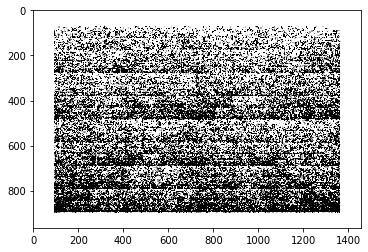

Accuracy: 0.9555555555555555


In [4]:
# Load Test chaos game representation dataset or make your own using function generate_images(sequences) shown below

DIR = 'CGR Test' # Directory of folders of images CGR Test and samples contains images used to train and test neural net
CAT = ['Candida','Saccharomyces']#OR ['Human', 'Saccharomyces'], Names of folders in directory index in CAT will be their label.

#Show Example images and their label
print('Example images')
print('0: ' + str(CAT[0]))
path = os.path.join(DIR, CAT[0])
img = plt.imread(os.path.join(path, os.listdir(path)[0]))
plt.imshow(img)
plt.show()

print('1: ' + str(CAT[1]))
path = os.path.join(DIR, CAT[1])
img = plt.imread(os.path.join(path, os.listdir(path)[1]))
plt.imshow(img)
plt.show()


test_data, test_y = load_test_data(DIR,CAT) #Load dataset to classify

p = predict_accuracy(test_data, test_y.T, sc_parameters) #Returns Precentage of correct classifications on test data

# Using loaded parameters we expect approximately 95% accuracy



In [4]:
'''Classification of randomly generated  Candida or Saccharomyces genome sample'''
#Genome Load
# Human Genome can be downloaded at NCBI: https://www.ncbi.nlm.nih.gov/genome/guide/human/
# human_chromosomes = chromosome_load('Genome Classification using CGR.ipynb')
candida_chromosomes = chromosome_load("candida_ASM18296v3_genomic.fna")
sacc_chromosomes = chromosome_load("sacc_R64_genomic.fna")

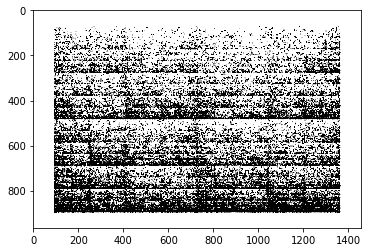

It is: Candida
Classificataion was correct


In [6]:
genomes = [candida_chromosomes, sacc_chromosomes] #0 label candida, 1 label yeast
i = np.random.randint(0,2)


sample = seq_sample(genomes[i][0:(len(genomes[i])-1)], 50000, 1)
generate_images(sample, 'random_sample')
                    
p = predict_single_yeast_candida('random_sample.png', sc_parameters,['Candida', 'Saccharomyces'])

if(p == i):
    print('Classificataion was correct')
else:
    print('Classificataion was incorrect')
    
                    

In [10]:

'''
Below is the code to generate your own chaos game representation dataset and train neural network
'''

# Generate Chaos Game representation images for Training or test
# Load genome data for species of interest

candida_chromosomes = chromosome_load("candida_ASM18296v3_genomic.fna")
sacc_chromosomes = chromosome_load("sacc_R64_genomic.fna")

# Generate random sequences sample of the genome, sample size = bps and number of samples = n

bps = 50000
n = 250 # samples for training, I used ~250 of each CAT

samples = seq_sample(candida_chromosomes[0:(len(candida_chromosomes)-1)], bps, n)

# generate and save an image for each element in samples
# These images compose the training and test data sets
generate_images(samples, "Candida_sample_")


samples = seq_sample(sacc_chromosomes[0:(len(sacc_chromosomes)-1)], bps, n)
generate_images(samples, "Sacc_sample_")


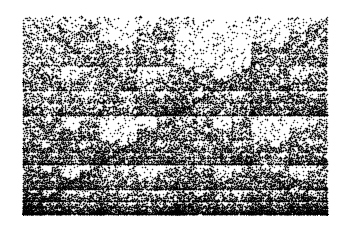

In [4]:
#Visual chaos game representation of a sequence
sequence = samples[0]
show_cgr(sequence)

In [6]:
# 2: Neural network training
DIR = '/Users/willcheney/CGR samples/' #Directory of folders containing training images
CAT = ['Candida', 'Saccharomyces'] #Folder labels for training images, CAT index will be used for labels

#Load training data
training_data, y = load_training_data(DIR, CAT)

#Define Neural Netowrk Dimensions
layers_dims = [training_data.shape[0], 50, 20, 15, 1]

#Train Neural Network, see CGR_image_classifier.py for internal functions
#Training time inversely proportion to genetic distance
#~750 iterations to train human/yeast
#~1700 iterations to train candida/sac

parameters = L_layer_model(training_data, y.T, layers_dims, learning_rate= .025, num_iterations = 2500, print_cost = True)



In [ ]:
#Training Dataset accuracy
p = predict_accuracy(training_data, y.T, parameters)

In [11]:
#load test data
DIR = '/Users/willcheney/CGR Test/' #Directory of folders of images
CAT = ['Candida','Saccharomyces'] #OR ['Human', 'Yeast], Names of folders in directory index in CAT will be their label.
test_data, test_y = load_test_data(DIR,CAT)

NameError: name 'load_test_data' is not defined

In [ ]:
#Test dataset accuracy
p = predict_accuracy(test_data, test_y.T, parameters)

In [ ]:
#Save trainined network
np.save('nn candida sacc parameters', parameters)

In [ ]:
#Classify Single image

img_path = '/Users/willcheney/CGR Test/Yeast/yeast_test_10.png'
predict_sin
